# Coffee Shop Sales

## 데이터 & 라이브러리 불러오기

In [1]:
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("ahmedabbas757/coffee-sales")
df = pd.read_excel(path + '/' + os.listdir(path)[0])
df.head()

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


transaction_id transaction_date transaction_time  transaction_qty  \
0               1       2023-01-01         07:06:11                2   
1               2       2023-01-01         07:08:56                2   
2               3       2023-01-01         07:14:04                2   
3               4       2023-01-01         07:20:24                1   
4               5       2023-01-01         07:22:41                2   

   store_id   store_location  product_id  unit_price    product_category  \
0         5  Lower Manhattan          32         3.0              Coffee   
1         5  Lower Manhattan          57         3.1                 Tea   
2         5  Lower Manhattan          59         4.5  Drinking Chocolate   
3         5  Lower Manhattan          22         2.0              Coffee   
4         5  Lower Manhattan          57         3.1                 Tea   

            product_type               product_detail  
0  Gourmet brewed coffee                  Ethiopia Rg  
1        Brewed Chai tea     Spicy Eye Opener Chai Lg  
2          Hot chocolate            Dark chocolate Lg  
3            Drip coffee  Our Old Time Diner Blend Sm  
4        Brewed Chai tea     Spicy Eye Opener Chai Lg

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px   # 인터랙티브(interactive) 그래프를 그릴 수 있게 해 주는 패키지. 고정된 이미지 형식 외에 인터랙티브 기능을 쓸 수 있는 html 파일로 저장도 가능
from plotly.offline import iplot  
from plotly.subplots import make_subplots

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [4]:
df['product_category'].unique()

array(['Coffee', 'Tea', 'Drinking Chocolate', 'Bakery', 'Flavours',
       'Loose Tea', 'Coffee beans', 'Packaged Chocolate', 'Branded'],
      dtype=object)

In [5]:
df['product_type'].unique()

array(['Gourmet brewed coffee', 'Brewed Chai tea', 'Hot chocolate',
       'Drip coffee', 'Scone', 'Barista Espresso', 'Brewed Black tea',
       'Brewed Green tea', 'Brewed herbal tea', 'Biscotti', 'Pastry',
       'Organic brewed coffee', 'Premium brewed coffee', 'Regular syrup',
       'Herbal tea', 'Gourmet Beans', 'Organic Beans', 'Sugar free syrup',
       'Drinking Chocolate', 'Premium Beans', 'Chai tea', 'Green beans',
       'Espresso Beans', 'Green tea', 'Organic Chocolate', 'Housewares',
       'Black tea', 'House blend Beans', 'Clothing'], dtype=object)

In [6]:
df['store_location'].unique()

array(['Lower Manhattan', "Hell's Kitchen", 'Astoria'], dtype=object)

In [7]:
df.describe()

transaction_id               transaction_date  transaction_qty  \
count   149116.000000                         149116    149116.000000   
mean     74737.371872  2023-04-15 11:50:32.173609984         1.438276   
min          1.000000            2023-01-01 00:00:00         1.000000   
25%      37335.750000            2023-03-06 00:00:00         1.000000   
50%      74727.500000            2023-04-24 00:00:00         1.000000   
75%     112094.250000            2023-05-30 00:00:00         2.000000   
max     149456.000000            2023-06-30 00:00:00         8.000000   
std      43153.600016                            NaN         0.542509   

            store_id     product_id     unit_price  
count  149116.000000  149116.000000  149116.000000  
mean        5.342063      47.918607       3.382219  
min         3.000000       1.000000       0.800000  
25%         3.000000      33.000000       2.500000  
50%         5.000000      47.000000       3.000000  
75%         8.000000      60.000000       3.750000  
max         8.000000      87.000000      45.000000  
std         2.074241      17.930020       2.658723

In [8]:
df.describe(include = object)  # 범주형 데이터도 요약

transaction_time  store_location product_category     product_type  \
count            149116          149116           149116           149116   
unique            25762               3                9               29   
top            09:31:15  Hell's Kitchen           Coffee  Brewed Chai tea   
freq                 41           50735            58416            17183   

             product_detail  
count                149116  
unique                   80  
top     Chocolate Croissant  
freq                   3076

In [9]:
# 데이터 중복체크 한 번에?
df.duplicated().any()

np.False_

In [10]:
df.nunique()

transaction_id      149116
transaction_date       181
transaction_time     25762
transaction_qty          6
store_id                 3
store_location           3
product_id              80
unit_price              41
product_category         9
product_type            29
product_detail          80
dtype: int64

In [11]:
pd.DataFrame({
    'count': df.shape[0],
    'nulls': df.isnull().sum(),
    'nulls%': df.isnull().mean() * 100,
    'cardinality': df.nunique()
})

count  nulls  nulls%  cardinality
transaction_id    149116      0     0.0       149116
transaction_date  149116      0     0.0          181
transaction_time  149116      0     0.0        25762
transaction_qty   149116      0     0.0            6
store_id          149116      0     0.0            3
store_location    149116      0     0.0            3
product_id        149116      0     0.0           80
unit_price        149116      0     0.0           41
product_category  149116      0     0.0            9
product_type      149116      0     0.0           29
product_detail    149116      0     0.0           80

## 데이터 정제

In [12]:
# 필요없는 컬럼 제거
df.drop(['transaction_id', 'store_id', 'product_id'], axis=1, inplace=True)
df

transaction_date transaction_time  transaction_qty   store_location  \
0            2023-01-01         07:06:11                2  Lower Manhattan   
1            2023-01-01         07:08:56                2  Lower Manhattan   
2            2023-01-01         07:14:04                2  Lower Manhattan   
3            2023-01-01         07:20:24                1  Lower Manhattan   
4            2023-01-01         07:22:41                2  Lower Manhattan   
...                 ...              ...              ...              ...   
149111       2023-06-30         20:18:41                2   Hell's Kitchen   
149112       2023-06-30         20:25:10                2   Hell's Kitchen   
149113       2023-06-30         20:31:34                1   Hell's Kitchen   
149114       2023-06-30         20:57:19                1   Hell's Kitchen   
149115       2023-06-30         20:57:19                2   Hell's Kitchen   

        unit_price    product_category           product_type  \
0             3.00              Coffee  Gourmet brewed coffee   
1             3.10                 Tea        Brewed Chai tea   
2             4.50  Drinking Chocolate          Hot chocolate   
3             2.00              Coffee            Drip coffee   
4             3.10                 Tea        Brewed Chai tea   
...            ...                 ...                    ...   
149111        2.50                 Tea      Brewed herbal tea   
149112        3.00                 Tea       Brewed Black tea   
149113        3.00                 Tea      Brewed herbal tea   
149114        3.75              Coffee       Barista Espresso   
149115        0.80            Flavours          Regular syrup   

                     product_detail  
0                       Ethiopia Rg  
1          Spicy Eye Opener Chai Lg  
2                 Dark chocolate Lg  
3       Our Old Time Diner Blend Sm  
4          Spicy Eye Opener Chai Lg  
...                             ...  
149111                Peppermint Rg  
149112         English Breakfast Lg  
149113                Peppermint Lg  
149114                   Cappuccino  
149115               Hazelnut syrup  

[149116 rows x 8 columns]

In [13]:
# 연, 월, 요일별 분석을 위한 분리

df['year'] = df['transaction_date'].dt.year
df['month'] = df['transaction_date'].dt.month_name()  # 월 이름을 추출
df['day'] = df['transaction_date'].dt.day_name()  # 일자 정보를 가지고 요일 이름을 추출

In [14]:
df['year'].unique()  # 연도는 2023년밖에 없음

array([2023], dtype=int32)

In [15]:
# 총 주문금액 = 수량 * 가격 컬럼 생성
df['total_revenue'] = df['transaction_qty'] * df['unit_price']
df.head(3)

transaction_date transaction_time  transaction_qty   store_location  \
0       2023-01-01         07:06:11                2  Lower Manhattan   
1       2023-01-01         07:08:56                2  Lower Manhattan   
2       2023-01-01         07:14:04                2  Lower Manhattan   

   unit_price    product_category           product_type  \
0         3.0              Coffee  Gourmet brewed coffee   
1         3.1                 Tea        Brewed Chai tea   
2         4.5  Drinking Chocolate          Hot chocolate   

             product_detail  year    month     day  total_revenue  
0               Ethiopia Rg  2023  January  Sunday            6.0  
1  Spicy Eye Opener Chai Lg  2023  January  Sunday            6.2  
2         Dark chocolate Lg  2023  January  Sunday            9.0

## 분석 및 시각화

### 1. 월별 데이터 분석

In [16]:
# 1) 월별 거래 건수 카운트
transactions_per_month = df['month'].value_counts()
transactions_per_month


month
June        35352
May         33527
April       25335
March       21229
January     17314
February    16359
Name: count, dtype: int64

/var/folders/j5/k02gbl3n7xj61xlrkps8gc0c0000gn/T/ipykernel_2983/1151664343.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




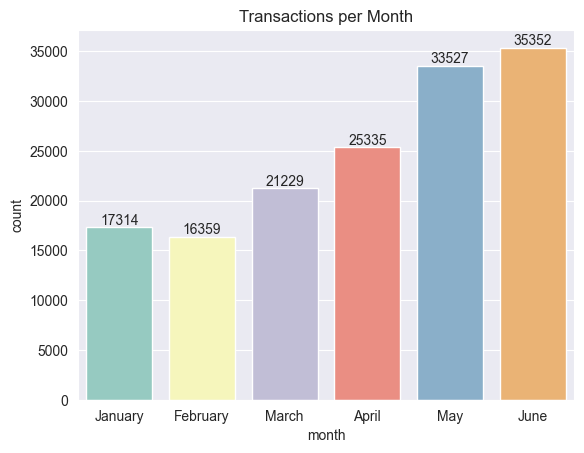

In [ ]:
# 1-1) 시각화 - countplot
ax = sns.countplot(x = 'month', data=df, palette='Set3')  # 팔레트를 통해 범주별 색상 다르게 적용
plt.title('Transactions per Month')

# 막대 위에 라벨 붙이기
for container in ax.containers:
    ax.bar_label(container)

plt.show()

In [ ]:
# 1_2) 시각화 - px (인터랙티브 그래프)_nbformat 설치 필요
fig = px.bar(x=transactions_per_month.index, 
            y=transactions_per_month.values,  
            labels = {'x' : 'Month', 'y' : 'Number of Transactions'},
            title = 'Transcation per Month', text_auto=True)

fig.show()

In [34]:
# 2) 월별 주문금액
total_revenue_per_month = df.groupby('month')['total_revenue'].sum().sort_values(ascending=False).reset_index()
total_revenue_per_month

month  total_revenue
0      June      166485.88
1       May      156727.76
2     April      118941.08
3     March       98834.68
4   January       81677.74
5  February       76145.19

/var/folders/j5/k02gbl3n7xj61xlrkps8gc0c0000gn/T/ipykernel_2983/1755253595.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




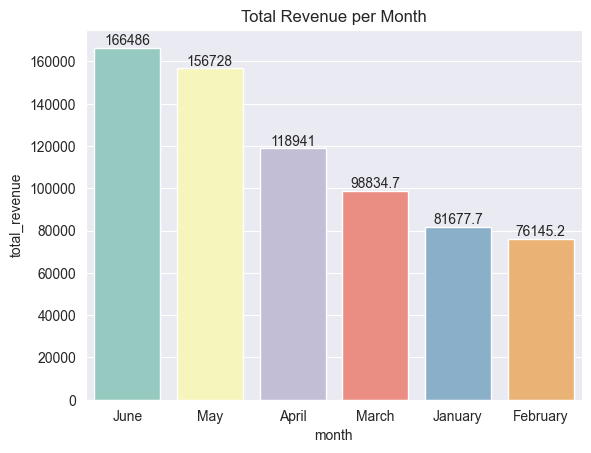

In [35]:
# 2-1) 시각화 - bar
ax = sns.barplot(x = 'month', y = 'total_revenue', data=total_revenue_per_month, palette='Set3')  # 팔레트를 통해 범주별 색상 다르게 적용
plt.title('Total Revenue per Month')

# 막대 위에 라벨 붙이기
for container in ax.containers:
    ax.bar_label(container)

plt.show()

In [51]:
# 2-2) 시각화 - px
fig = px.bar(x=total_revenue_per_month['month'], 
            y=total_revenue_per_month['total_revenue'],  
            labels = {'x' : 'Month', 'y' : 'Total Revenue'},
            title = 'Total Revenue per Month', text_auto=True)

fig.show()

### 2. 요일별 데이터 분석

In [37]:
# 1) 요일별 주문건수
transactions_per_day = df['day'].value_counts()
transactions_per_day

day
Friday       21701
Thursday     21654
Monday       21643
Wednesday    21310
Tuesday      21202
Sunday       21096
Saturday     20510
Name: count, dtype: int64

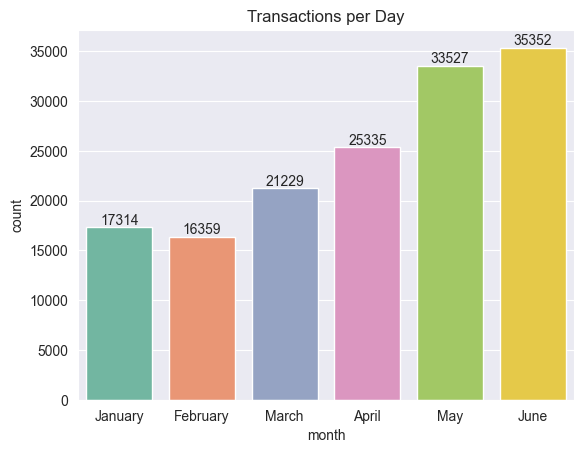

In [40]:
# 1-1) 시각화 - countplot
ax = sns.countplot(data=df, x='month', hue='month', palette='Set2')  # hue: 색상 그룹핑 기준을 지정해주는 것을 권장! 안하면 경고메시지 발생
plt.title('Transactions per Day')

for container in ax.containers:
    ax.bar_label(container)

plt.show()

In [43]:
# 1-2) 시각화 - px
fig = px.bar(x = transactions_per_day.index,
             y = transactions_per_day.values,
             labels = {'x':'Day', 'y':'Number of Transactions'},
             title = 'Transcations per Day',
             color = transactions_per_day.index,  # 요일마다 색 다르게
             color_discrete_sequence = px.colors.qualitative.Set2,  # 색상 팔레트를 리스트형태로 불러와야 함. sns처럼 문자열로 작성하면 에러 발생
             text_auto = True)

fig.show()

In [55]:
# 2) 요일별 주문금액
total_revenue_per_day = df.groupby('day')['total_revenue'].sum().sort_values(ascending=False).reset_index()
total_revenue_per_day

day  total_revenue
0     Monday      101677.28
1     Friday      101373.00
2   Thursday      100767.78
3  Wednesday      100313.54
4    Tuesday       99455.94
5     Sunday       98330.31
6   Saturday       96894.48

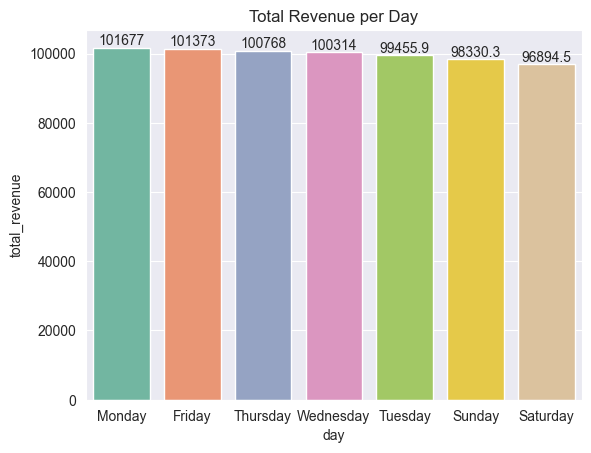

In [49]:
# 2-1) 시각화 - barplot
ax = sns.barplot(data = total_revenue_per_day,
            x = 'day',
            y = 'total_revenue',
            hue = 'day',
            palette = 'Set2')
plt.title('Total Revenue per Day')

for container in ax.containers:
    ax.bar_label(container)

plt.show()

In [59]:
# 2-2) 시각화 - px
fig = px.bar(x = total_revenue_per_day['day'],
             y = total_revenue_per_day['total_revenue'],
             labels = {'x':'Day', 'y':'Total Revenue'},
             title = 'Total Revenu per Day',
             text_auto = True,
             color = total_revenue_per_day['day'],
             color_discrete_sequence = px.colors.qualitative.Set2)

fig.show()

### 3. 시간대별 데이터 분석

In [ ]:
# 1) 시간대별 주문건수 컬럼 생성
df['hour'] = df['transaction_time'].apply(lambda x: x.hour)  # transaction_time 컬럼의 각 값에 대해 .hour 속성 추출 

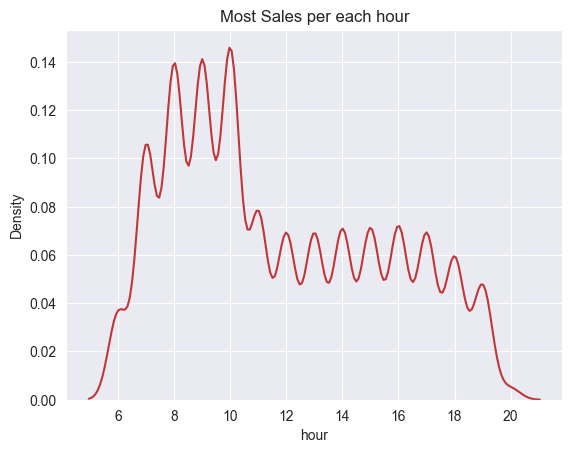

In [62]:
# 시각화
# KDEPlot은 히스토그램과 비슷하지만, 데이터의 분포를 더 부드러운 곡선 형태로 나타내줌
sns.kdeplot(df['hour'])
plt.title('Most Sales per each hour')
plt.show()

In [67]:
df.head()

transaction_date transaction_time  transaction_qty   store_location  \
0       2023-01-01         07:06:11                2  Lower Manhattan   
1       2023-01-01         07:08:56                2  Lower Manhattan   
2       2023-01-01         07:14:04                2  Lower Manhattan   
3       2023-01-01         07:20:24                1  Lower Manhattan   
4       2023-01-01         07:22:41                2  Lower Manhattan   

   unit_price    product_category           product_type  \
0         3.0              Coffee  Gourmet brewed coffee   
1         3.1                 Tea        Brewed Chai tea   
2         4.5  Drinking Chocolate          Hot chocolate   
3         2.0              Coffee            Drip coffee   
4         3.1                 Tea        Brewed Chai tea   

                product_detail  year    month     day  total_revenue  hour  
0                  Ethiopia Rg  2023  January  Sunday            6.0     7  
1     Spicy Eye Opener Chai Lg  2023  January  Sunday            6.2     7  
2            Dark chocolate Lg  2023  January  Sunday            9.0     7  
3  Our Old Time Diner Blend Sm  2023  January  Sunday            2.0     7  
4     Spicy Eye Opener Chai Lg  2023  January  Sunday            6.2     7

In [70]:
# 2) 시간대별 상품별 주문건수
sales_per_hour = df.groupby(['hour', 'product_category'])['transaction_qty'].sum().reset_index()
sales_per_hour

hour    product_category  transaction_qty
0       6              Bakery              753
1       6             Branded               25
2       6              Coffee             2588
3       6        Coffee beans               50
4       6  Drinking Chocolate              663
..    ...                 ...              ...
130    20  Drinking Chocolate               88
131    20            Flavours               78
132    20           Loose Tea                2
133    20  Packaged Chocolate                7
134    20                 Tea              291

[135 rows x 3 columns]

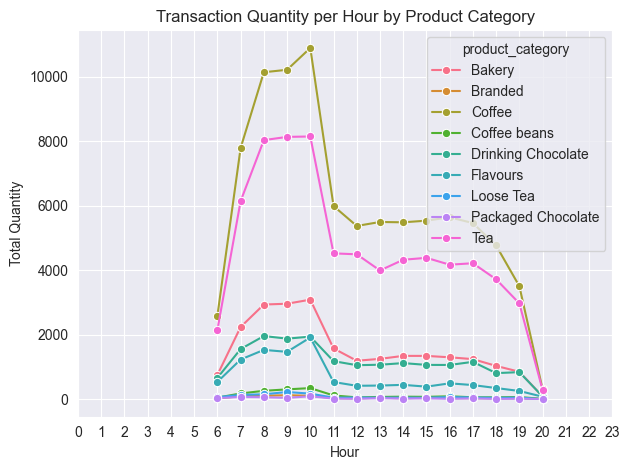

In [73]:
# 2-1) 시각화 - Line Plot
ax = sns.lineplot(data = sales_per_hour,
             x = 'hour',
             y = 'transaction_qty',
             hue = 'product_category',
             marker = 'o' )

plt.title('Transaction Quantity per Hour by Product Category')
plt.xlabel('Hour')
plt.ylabel('Total Quantity')
plt.xticks(range(0, 24))
plt.tight_layout()

plt.show()

In [77]:
# 2-2) 시각화 - px
fig = px.bar(sales_per_hour, 
             x = 'hour',
             y = 'transaction_qty',
             color = 'product_category',
             title = 'Transaction Quantity per Hour by Product Category',
             labels = {'transaction_qty':'Total Quantity'},
             barmode = 'stack',   # 또는 group으로 변경 가능_다음 셸
             color_discrete_sequence = px.colors.qualitative.Set2)

fig.show()   

In [78]:
# 2-3) 시각화 - px_group
fig = px.bar(sales_per_hour, 
             x = 'hour',
             y = 'transaction_qty',
             color = 'product_category',
             title = 'Transaction Quantity per Hour by Product Category',
             labels = {'transaction_qty':'Total Quantity'},
             barmode = 'group',   # 또는 group으로 변경 가능_다음 셸
             color_discrete_sequence = px.colors.qualitative.Set2)

fig.show()   

### 4. 위치별 분석

In [80]:
# 1) 위치별 수익
fig = px.pie(df,                          # 원형 차트 pie
             names = 'store_location',    # 각 파이 조각의 레이블 대상
             values = 'total_revenue',    # 파이 조각의 크기 설정_매장 위치별 총 수익 값을 기준으로 크기 결정
             title = 'Total Revenue Distribution by Store Location',
             hole = 0.3)                  # 차트 중앙에 구멍 영역 설정

fig.show()

In [82]:
# 2) 위치별 상품카테고리 판매 분석
sales_per_location = df.groupby(['store_location', 'product_category'])['transaction_qty'].sum().reset_index()
sales_per_location

store_location    product_category  transaction_qty
0           Astoria              Bakery             7496
1           Astoria             Branded              279
2           Astoria              Coffee            29655
3           Astoria        Coffee beans              502
4           Astoria  Drinking Chocolate             6351
5           Astoria            Flavours             2206
6           Astoria           Loose Tea              344
7           Astoria  Packaged Chocolate              110
8           Astoria                 Tea            24048
9    Hell's Kitchen              Bakery             7678
10   Hell's Kitchen             Branded              119
11   Hell's Kitchen              Coffee            30220
12   Hell's Kitchen        Coffee beans              790
13   Hell's Kitchen  Drinking Chocolate             5672
14   Hell's Kitchen            Flavours             3596
15   Hell's Kitchen           Loose Tea              485
16   Hell's Kitchen  Packaged Chocolate              197
17   Hell's Kitchen                 Tea            22980
18  Lower Manhattan              Bakery             8040
19  Lower Manhattan             Branded              378
20  Lower Manhattan              Coffee            29375
21  Lower Manhattan        Coffee beans              536
22  Lower Manhattan  Drinking Chocolate             5434
23  Lower Manhattan            Flavours             4709
24  Lower Manhattan           Loose Tea              381
25  Lower Manhattan  Packaged Chocolate              180
26  Lower Manhattan                 Tea            22709

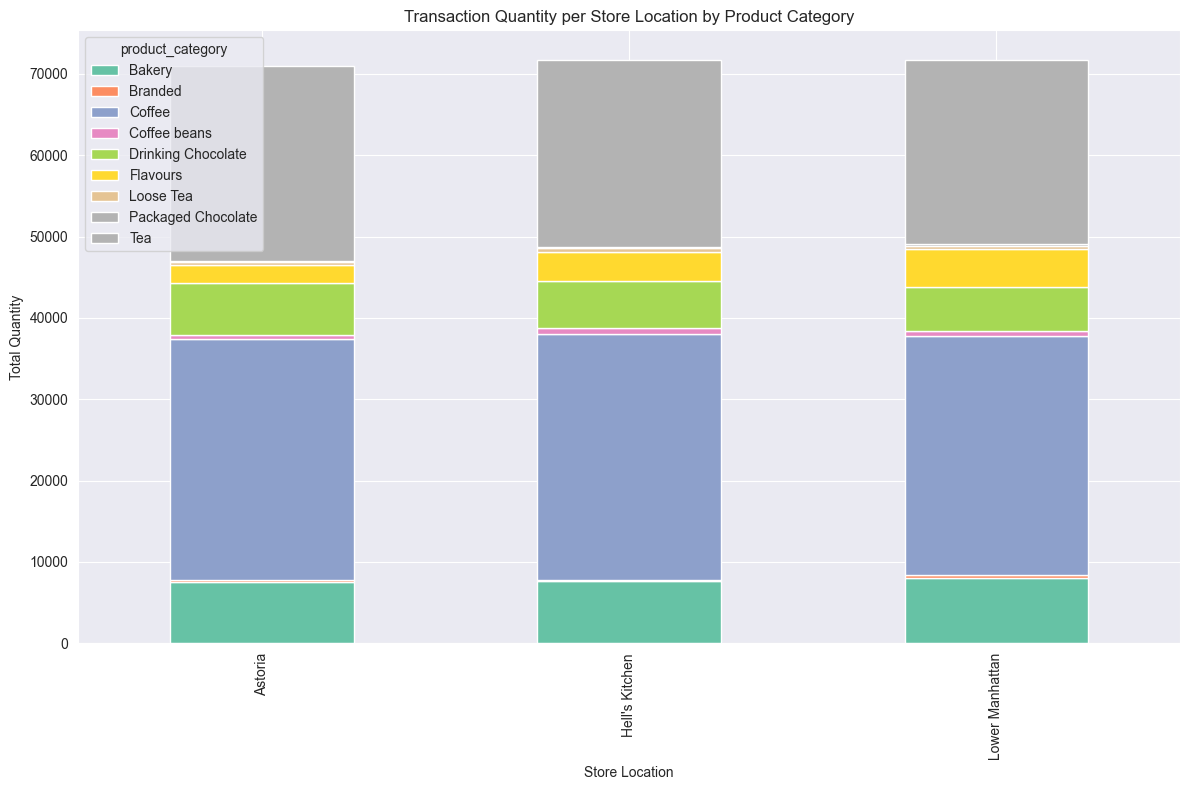

In [87]:
# 2-1) 시각화 - barplot

# 판매량을 테이블 형식으로 변환하는 피벗
pivot_sales = sales_per_location.pivot(index='store_location', columns = 'product_category', values = 'transaction_qty').fillna(0)

# Stacked bar plot
pivot_sales.plot(kind='bar', figsize=(12,8), stacked=True, colormap='Set2')
plt.title('Transaction Quantity per Store Location by Product Category')
plt.xlabel("Store Location")
plt.ylabel("Total Quantity")
plt.tight_layout()
plt.show()

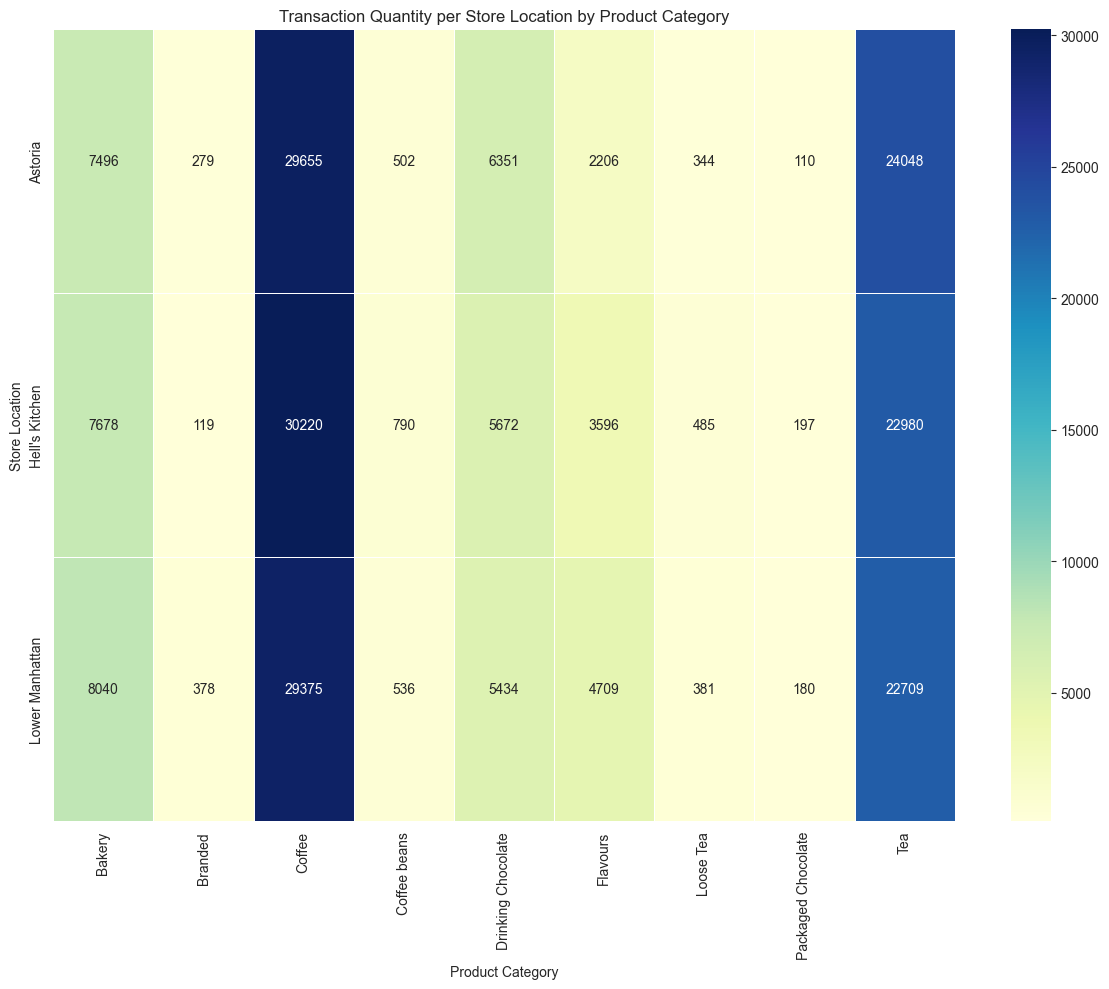

In [90]:
# 2-2) 시각화 - 히트맵

# 피벗된 테이블 사용

plt.figure(figsize=(12,10))
sns.heatmap(pivot_sales, annot=True, cmap='YlGnBu', fmt='g', linewidths=0.5)
# annot=True: 각 셀에 실제 숫자 값 표시 / fmt='g': 숫자 표시 형식_일반 숫자
# 색상: 노랑 -> 초록 -> 파랑; 값이 높을수록 파란색으로 변해감

plt.title("Transaction Quantity per Store Location by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Store Location")
plt.tight_layout()
plt.show()

In [96]:
# 2-3) 시각화 - px

fig = px.bar(sales_per_location, 
             x = 'store_location',
             y = 'transaction_qty',
             color = 'product_category', 
             title = 'Transaction Quantity per Store Location by Product Category', 
             labels = {'transaction_qty':'Total Quantity'},
             barmode = 'stack',
             color_discrete_sequence=px.colors.qualitative.Set3)

fig.show()